In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
import pylab
import scipy. stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd. read_csv("E:\LiveProject\Water Quality Testing\Water Quality Testing.csv")

In [3]:
df. head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [4]:
df=df. drop(["Sample ID"], axis = 1)

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pH                       500 non-null    float64
 1   Temperature (°C)         500 non-null    float64
 2   Turbidity (NTU)          500 non-null    float64
 3   Dissolved Oxygen (mg/L)  500 non-null    float64
 4   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [6]:
df = df. rename(columns = {"Temperature (°C)": "Temperature_(°C)", "Turbidity (NTU)": "Turbidity_NTU",
                           "Dissolved Oxygen (mg/L)": "Dissolved Oxygen_mg/L", "Conductivity (µS/cm)": "Conductivity_µS/cm"})

In [7]:
df. dtypes

pH                       float64
Temperature_(°C)         float64
Turbidity_NTU            float64
Dissolved Oxygen_mg/L    float64
Conductivity_µS/cm         int64
dtype: object

In [8]:
df. duplicated(). sum()

157

In [9]:
df = df. drop_duplicates()

In [10]:
df. isna(). sum()

pH                       0
Temperature_(°C)         0
Turbidity_NTU            0
Dissolved Oxygen_mg/L    0
Conductivity_µS/cm       0
dtype: int64

In [11]:
df. min()

pH                         6.83
Temperature_(°C)          20.30
Turbidity_NTU              3.10
Dissolved Oxygen_mg/L      6.00
Conductivity_µS/cm       316.00
dtype: float64

In [12]:
df. max()

pH                         7.48
Temperature_(°C)          23.60
Turbidity_NTU              5.10
Dissolved Oxygen_mg/L      9.90
Conductivity_µS/cm       370.00
dtype: float64

In [13]:
df. mean()

pH                         7.161429
Temperature_(°C)          22.082507
Turbidity_NTU              4.141983
Dissolved Oxygen_mg/L      8.341691
Conductivity_µS/cm       343.405248
dtype: float64

In [14]:
df. var()

pH                         0.012426
Temperature_(°C)           0.813143
Turbidity_NTU              0.171215
Dissolved Oxygen_mg/L      0.740157
Conductivity_µS/cm       175.692019
dtype: float64

In [15]:
df. std()

pH                        0.111473
Temperature_(°C)          0.901745
Turbidity_NTU             0.413781
Dissolved Oxygen_mg/L     0.860324
Conductivity_µS/cm       13.254887
dtype: float64

In [18]:
df. skew(skipna = True, axis = 0)

pH                       0.075207
Temperature_(°C)        -0.185779
Turbidity_NTU           -0.271601
Dissolved Oxygen_mg/L   -0.277183
Conductivity_µS/cm       0.124982
dtype: float64

In [19]:
df. kurtosis(skipna = True, axis = 0)

pH                      -0.513520
Temperature_(°C)        -1.208467
Turbidity_NTU           -0.752424
Dissolved Oxygen_mg/L   -0.594717
Conductivity_µS/cm      -1.029524
dtype: float64

In [31]:
df. var() == 0

pH                       False
Temperature_(°C)         False
Turbidity_NTU            False
Dissolved Oxygen_mg/L    False
Conductivity_µS/cm       False
dtype: bool

In [23]:
##outlier checking
# Select the columns you want to analyze for outliers
columns_of_interest = ['pH', 'Temperature_(°C)', 'Turbidity_NTU', 'Dissolved Oxygen_mg/L', 'Conductivity_µS/cm']

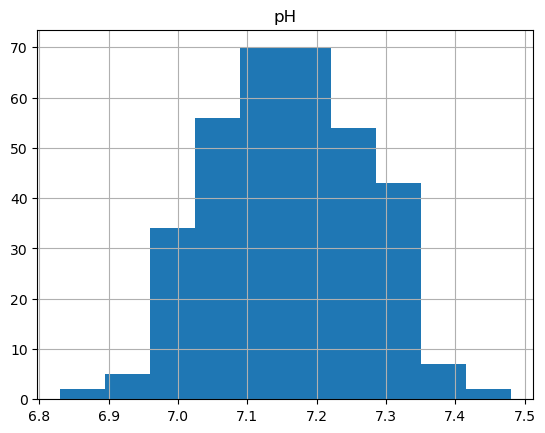

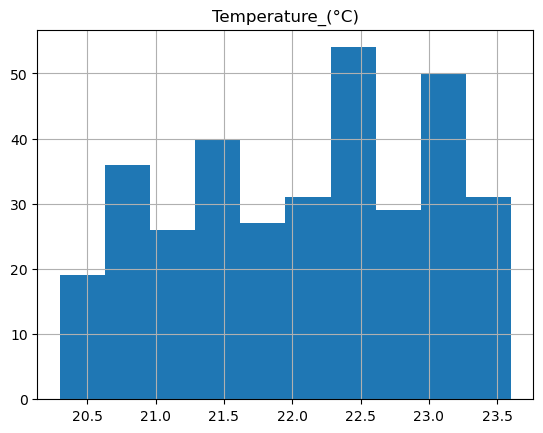

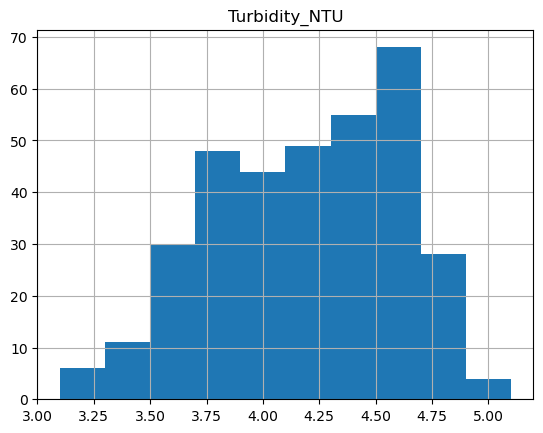

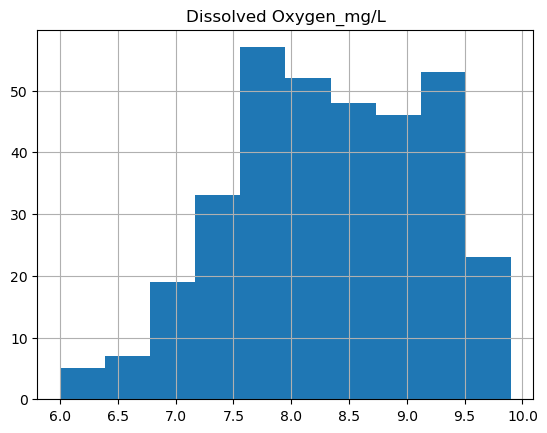

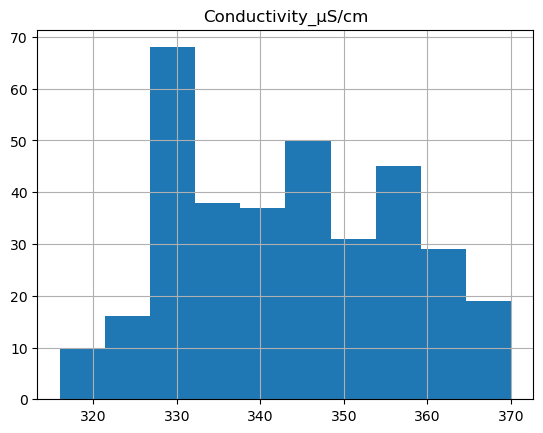

In [24]:
for column in columns_of_interest:
    plt.figure()
    df[column].hist()
    plt.title(column)
    plt.show()

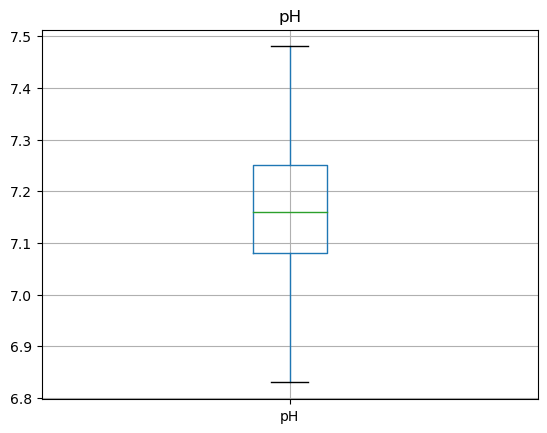

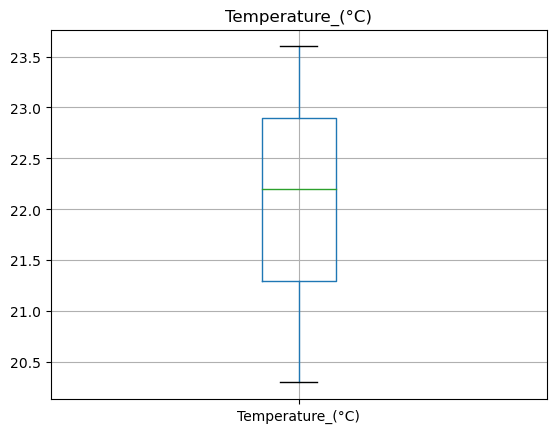

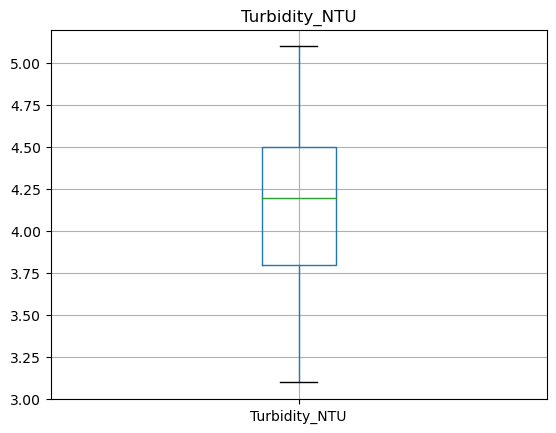

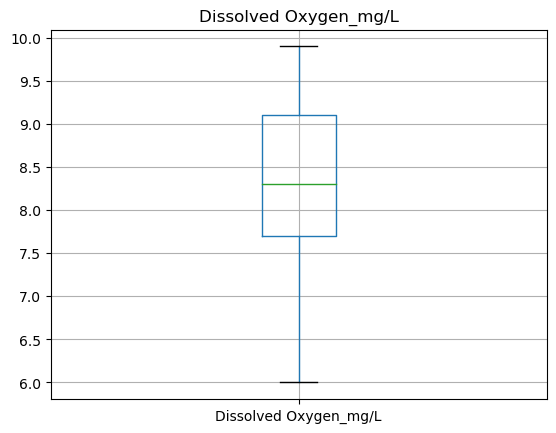

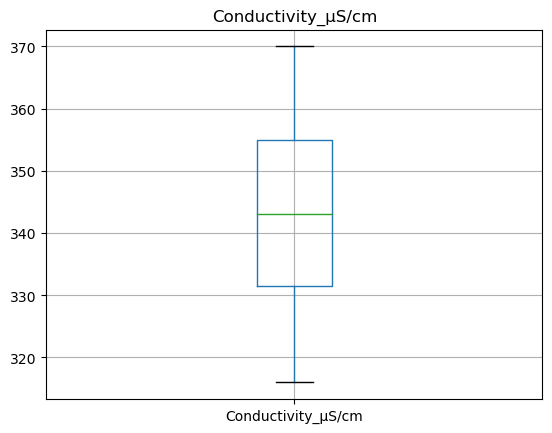

In [25]:
# Create a box plot for each column
for column in columns_of_interest:
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=column)
    plt.title(column)  # Set the title of the box plot as the column name

plt.show()  # Display all the box plots together
## No outlier

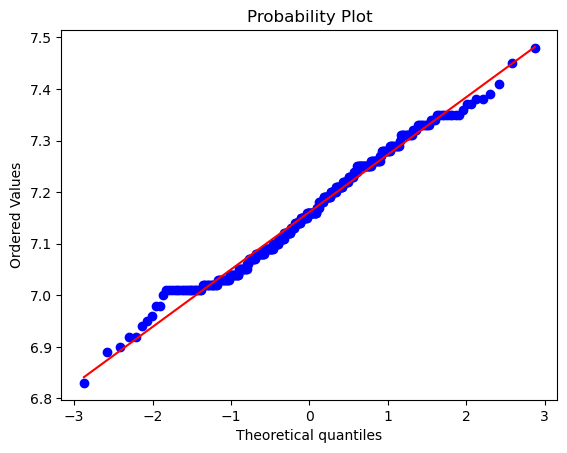

In [26]:
stats. probplot(df['pH'], dist = 'norm', plot = pylab); plt. show()

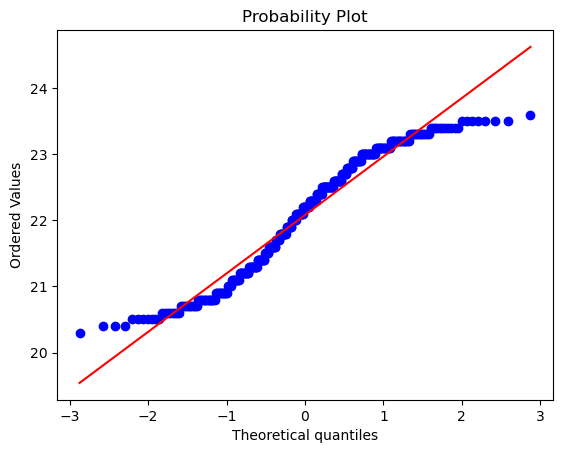

In [27]:
stats. probplot(df['Temperature_(°C)'], dist = 'norm', plot = pylab); plt. show()

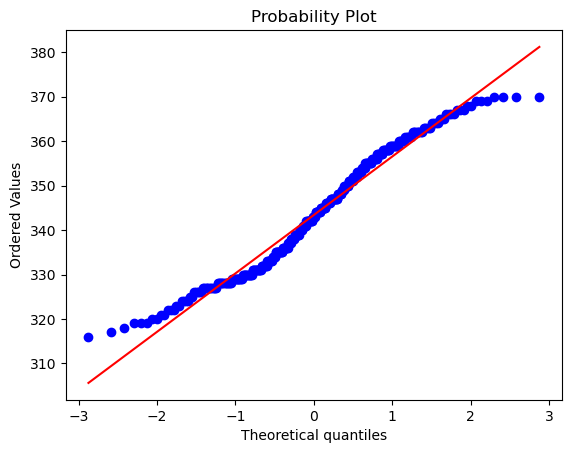

In [28]:
stats. probplot(df['Conductivity_µS/cm'], dist = 'norm', plot = pylab); plt. show()

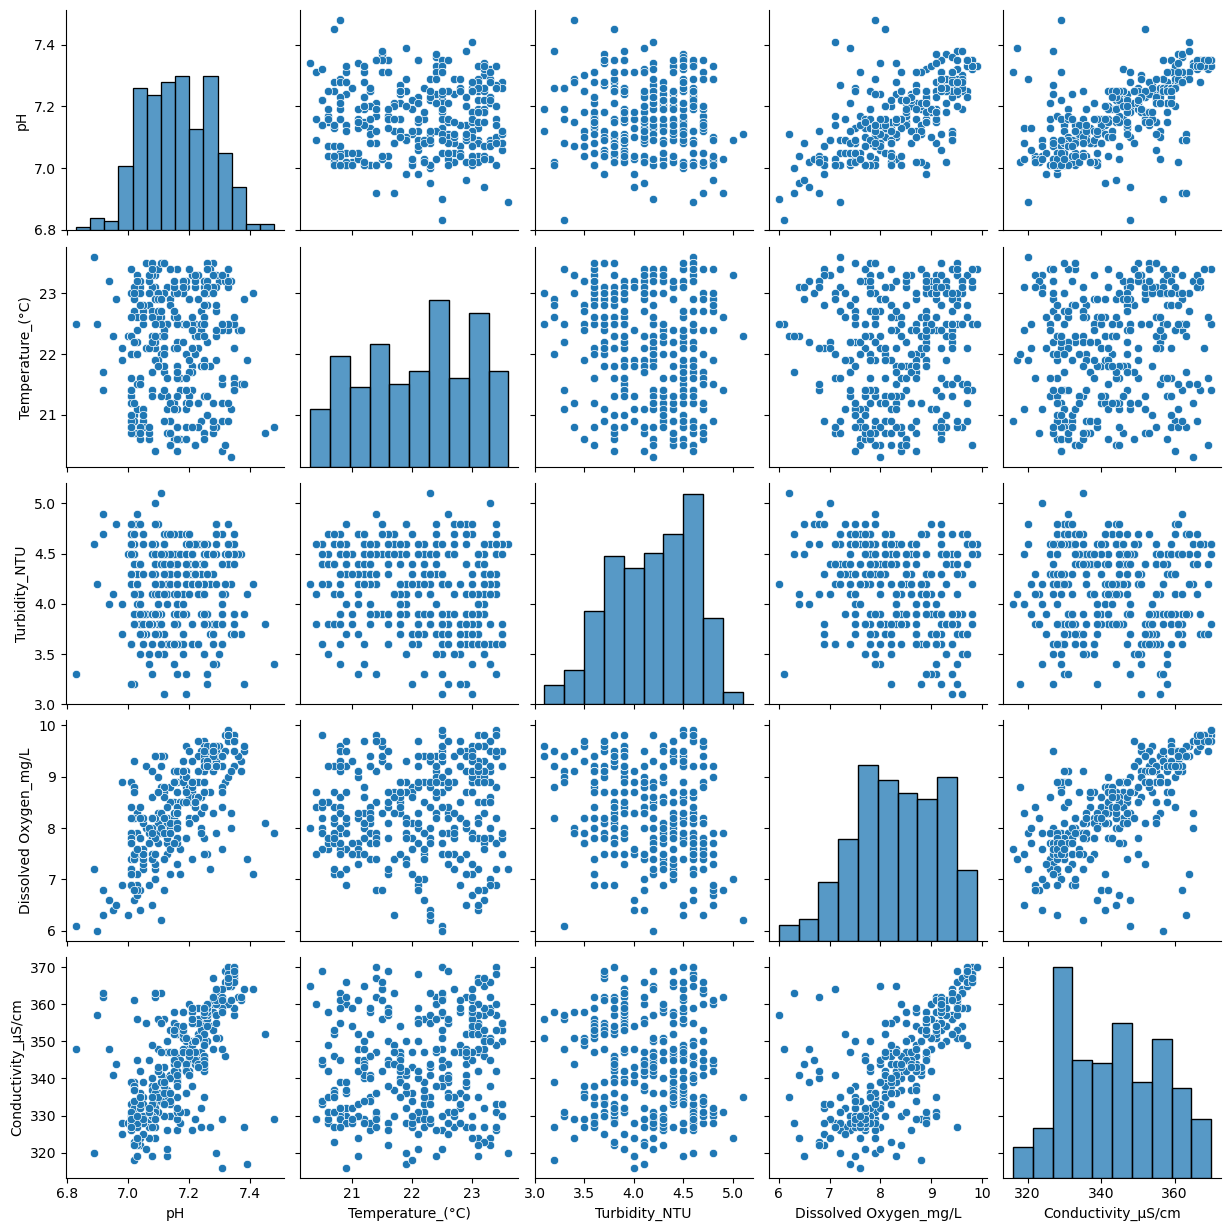

In [30]:
sns.pairplot(df)

In [33]:
df. describe()

,pH,Temperature_(°C),Turbidity_NTU,Dissolved Oxygen_mg/L,Conductivity_µS/cm
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,7.161429,22.082507,4.141983,8.341691,343.405248
std,0.111473,0.901745,0.413781,0.860324,13.254887
min,6.830000,20.300000,3.100000,6.000000,316.000000
25%,7.080000,21.300000,3.800000,7.700000,331.500000
50%,7.160000,22.200000,4.200000,8.300000,343.000000
75%,7.250000,22.900000,4.500000,9.100000,355.000000
max,7.480000,23.600000,5.100000,9.900000,370.000000


In [34]:
# Select the input variables and the output variable
X = df[["Temperature_(°C)", "Turbidity_NTU", "Dissolved Oxygen_mg/L", "Conductivity_µS/cm"]]
y = df["pH"]

In [36]:
# Split the data into training and testing sets
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [39]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model using R-squared score
from sklearn. metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score: {:.2f}".format(r2))

R-squared score: 0.34


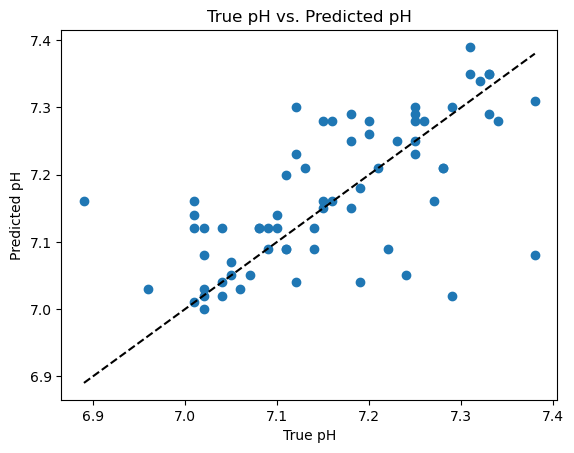

In [44]:
# Plot predicted pH values versus true pH values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # Identity line
plt.xlabel('True pH')
plt.ylabel('Predicted pH')
plt.title('True pH vs. Predicted pH')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

In [48]:
# Evaluate the model using R-squared score
from sklearn. metrics import r2_score
r2_score = r2_score(y_test, y_pred_lr)
print("R-squared score: {:.2f}".format(r2_score))

R-squared score: 0.53


In [49]:
import pickle
pickle. dump(model, open("water_quality_dt.pickle", "wb"))